In [16]:
import pandas as pd 
import numpy as np
import os
import sys
import seaborn as sns
import akshare as ak
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import warnings

os.chdir(sys.path[0] + "\\..")
os.getcwd()

'd:\\Documents\\PycharmProject\\eastmoney_data'

In [17]:
df = pd.read_csv("个股研报.csv")

In [18]:
df[["publishDate","title","orgSName","emRatingValue","emRatingName"]].sort_values("publishDate")

,publishDate,title,orgSName,emRatingValue,emRatingName
15235,2021-04-18 00:00:00.000,环氧丙烷高价支撑业绩增长，C3C4项目为公司带来发展动能,西南证券,3.0,买入
50527,2021-04-18 00:00:00.000,业绩靓丽，现金流大幅改善,西南证券,3.0,买入
50525,2021-04-18 00:00:00.000,全年归母净利增长21%，“餐饮+食品”双轮发展,天风证券,3.0,买入
50524,2021-04-18 00:00:00.000,21Q1经营符合预期，表现持续优于同业,天风证券,3.0,买入
50523,2021-04-18 00:00:00.000,国内国外延续高增长态势，一季度业绩大幅增长,天风证券,3.0,买入
...,...,...,...,...,...
67597,2023-07-02 00:00:00.000,公司事件点评报告：进攻号角已吹起，长远规划势能强,华鑫证券,3.0,买入
67598,2023-07-02 00:00:00.000,公司动态研究报告：稀土永磁产能持续增长，新兴产业带来需求增量,华鑫证券,3.0,买入
67583,2023-07-02 00:00:00.000,Q1业绩回升，米拉多铜矿或带来业绩高速增长,海通国际,2.0,增持
67586,2023-07-02 00:00:00.000,电解液盈利触底，氟化工高景气有望带来估值重塑,德邦证券,3.0,买入


In [19]:
dirPath = "data/raw/sohu_stock/"
data_date_lst = [] 
for filename in os.listdir(dirPath):
    if os.path.isdir(dirPath + filename):
        data_date_lst.append(datetime.strptime(filename, '%Y-%m-%d').date())

date = max(data_date_lst).strftime('%Y-%m-%d')
tag_df = pd.read_csv(dirPath + date + ".csv")
tag_df

,stockCode,stockName,sector,sectorCount,date
0,600337,美克家居,2025规划,82,2023-06-24
1,300720,海川智能,2025规划,82,2023-06-24
2,810,创维数字,2025规划,82,2023-06-24
3,603111,康尼机电,2025规划,82,2023-06-24
4,300729,乐歌股份,2025规划,82,2023-06-24
...,...,...,...,...,...
62769,600666,ST瑞德,黑龙江板块,40,2023-06-24
62770,300900,广联航空,黑龙江板块,40,2023-06-24
62771,600853,龙建股份,黑龙江板块,40,2023-06-24
62772,688459,哈铁科技,黑龙江板块,40,2023-06-24


In [20]:
tag_df = tag_df.groupby("stockCode").agg(
    sectorList=("sector", list),
    sectorCount=("sectorCount", list)
).reset_index()

# # ChatGPT Suggestion
# result = t.groupby('c').apply(lambda group: pd.Series({
#     'x': group.index.size,
#     'c_list': list(zip(group['c'], group['b'])),
#     'abs_mean': (group['b'] * group['d']).abs().mean()
# }))

In [21]:
rating_df = df[df["emRatingValue"].notnull()].groupby(["stockCode","stockName"]).agg(
    orgCount=("stockCode", "count"),
    orgSList=("orgSName", set),
    emRatingValue=("emRatingValue", "sum")
).reset_index()

In [22]:
pd.merge(rating_df,tag_df,on="stockCode").sort_values("emRatingValue")

,stockCode,stockName,orgCount,orgSList,emRatingValue,sectorList,sectorCount
1418,301002,崧盛股份,1,{天风证券},0.0,"[LED, 创业板注册制, 创业板综, 机构重仓, 植物照明, 深圳板块, 电力设备, 融资...","[90, 458, 1270, 1217, 17, 429, 343, 3260, 504]"
2075,601375,中原证券,1,{海通国际},0.0,"[AH股, 互联金融, 债转股, 券商概念, 国企改革, 富时罗素, 标准普尔, 沪股通, ...","[148, 215, 46, 56, 1122, 1313, 1085, 1275, 110..."
123,756,新华制药,1,{中邮证券},0.0,"[AH股, 医疗美容, 医药生物, 参股银行, 国企改革, 富时罗素, 山东板块, 幽门螺杆...","[148, 65, 491, 234, 1122, 1313, 305, 47, 56, 1..."
270,2029,七匹狼,2,{东吴证券},0.0,"[参股保险, 口罩, 深港通, 电商概念, 破净股, 福建板块, 纺织服饰, 融资融券, 证...","[94, 166, 1738, 314, 380, 173, 118, 3260, 248]"
534,2494,华斯股份,2,{东吴证券},0.0,"[互联金融, 地摊经济, 大数据, 机构重仓, 河北板块, 深港通, 电商概念, 社区团购,...","[215, 36, 303, 1217, 77, 1738, 314, 35, 118, 1..."
...,...,...,...,...,...,...,...
1921,600809,山西汾酒,278,"{浙商证券, 山西证券, 太平洋, 海通国际, 东莞证券, 国金证券, 中国银河, 中银证券...",792.0,"[HS300_, MSCI中国, 上证180_, 上证50_, 国企改革, 基金重仓, 富时...","[300, 665, 180, 50, 1122, 212, 1313, 41, 1085,..."
2060,601238,广汽集团,283,"{浙商证券, 太平洋, 山西证券, 中国银河, 东吴证券, 天风证券, 群益证券, 开源证券...",834.0,"[AH股, HS300_, MSCI中国, 上证180_, 华为概念, 华为汽车, 国企改革...","[148, 300, 665, 180, 571, 41, 1122, 1313, 439,..."
2103,601633,长城汽车,322,"{浙商证券, 山西证券, 太平洋, 东莞证券, 中国银河, 中银证券, 东吴证券, 首创证券...",892.0,"[AH股, HS300_, MSCI中国, 上证180_, 上证50_, 人工智能, 华为概...","[148, 300, 665, 180, 50, 466, 571, 51, 1313, 5..."
586,2594,比亚迪,326,"{招银国际, 浙商证券, 太平洋, 山西证券, 海通国际, 东莞证券, 国金证券, 中国银河...",903.0,"[2025规划, AH股, HS300_, IGBT概念, MSCI中国, 储能, 充电桩,...","[82, 148, 300, 35, 665, 266, 201, 12, 70, 255,..."


### Based on Sector

In [23]:
WINDOW = 30

rating_df = pd.read_csv("个股研报.csv")
# rating_df = rating_df[rating_df['publishDate'] < "2023-04-20"]
rating_df['publishDate'] = pd.to_datetime(rating_df['publishDate'])


In [24]:
# rating_df = rating_df[rating_df['publishDate'] <= pd.to_datetime('2023-06-11')]


rating_df = rating_df[rating_df['publishDate'] > rating_df["publishDate"].max() - pd.Timedelta(days=WINDOW)]
rating_df['publishDate'] = rating_df["publishDate"].max() - pd.to_datetime(rating_df['publishDate'])
rating_df['publishDate'] = rating_df['publishDate'].astype('timedelta64[D]').astype(int)
rating_df["emRatingValue"] = rating_df["emRatingValue"] * np.exp(np.linspace(-5, 0, WINDOW))[-(rating_df['publishDate']+1)]

# rating_df[['title','publishDate']].sort_values("publishDate")

In [25]:
rating_df = rating_df[rating_df["emRatingValue"].notnull()].groupby(["stockCode","stockName"]).agg(
    orgCount=("stockCode", "count"),
    orgSList=("orgSName", set),
    emRatingValue=("emRatingValue", "mean")
).reset_index()

In [26]:
rating_df

,stockCode,stockName,orgCount,orgSList,emRatingValue
0,2,万科A,1,{开源证券},0.028537
1,26,飞亚达,1,{信达证券},0.019025
2,32,深桑达A,4,"{华鑫证券, 浙商证券, 华西证券}",0.289606
3,60,中金岭南,1,{华鑫证券},1.788489
4,63,中兴通讯,5,"{信达证券, 天风证券, 群益证券}",0.800296
...,...,...,...,...,...
563,833533,骏创科技,1,{华福证券},0.318935
564,834033,康普化学,1,{国信证券},1.266862
565,837663,明阳科技,2,{西南证券},2.125027
566,871694,中裕科技,3,{中泰证券},0.037916


In [27]:
dirPath = "data/raw/sohu_stock/"
data_date_lst = [] 
for filename in os.listdir(dirPath):
    if os.path.isdir(dirPath + filename):
        data_date_lst.append(datetime.strptime(filename, '%Y-%m-%d').date())

date = max(data_date_lst).strftime('%Y-%m-%d')
tag_df = pd.read_csv(dirPath + date + ".csv")
tag_df

,stockCode,stockName,sector,sectorCount,date
0,600337,美克家居,2025规划,82,2023-06-24
1,300720,海川智能,2025规划,82,2023-06-24
2,810,创维数字,2025规划,82,2023-06-24
3,603111,康尼机电,2025规划,82,2023-06-24
4,300729,乐歌股份,2025规划,82,2023-06-24
...,...,...,...,...,...
62769,600666,ST瑞德,黑龙江板块,40,2023-06-24
62770,300900,广联航空,黑龙江板块,40,2023-06-24
62771,600853,龙建股份,黑龙江板块,40,2023-06-24
62772,688459,哈铁科技,黑龙江板块,40,2023-06-24


In [28]:
pd.set_option('display.max_rows', 200)
df = pd.merge(rating_df,tag_df, on=["stockCode","stockName"])
df = df.groupby("sector").agg(
    orgCount=("orgCount", sum),
    emRatingValue=("emRatingValue", "sum"),
    orgSList=("orgSList", lambda x:+x),
    stockCodeList=("stockCode", set),
    stockNameList=("stockName", set),
    weight=("emRatingValue", list),
).reset_index()
df["orgSList"] = df["orgSList"].agg(lambda lst: set().union(*lst))
df["stockCount"] = df["stockCodeList"].agg(lambda lst: len(lst))


In [29]:
df["stockCount"].mean()

17.088172043010754

In [30]:
df["emRatingWeight"] = df["stockCount"] + df["stockCount"].mean()/df["stockCount"]
df["emRatingRatio"] = (df["emRatingValue"]) / df["emRatingWeight"]
df = df[~df['sector'].isin(["央视50_","AH股","分拆预期","破净股","证金持股","上证50_","HS300_","上证180_","中证500","深成500","深证100R","标准普尔"])]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.sort_values("emRatingRatio")[['sector','emRatingValue','stockCount', 'emRatingRatio', 'emRatingWeight']])
    # print(df.sort_values("stockCount")[['sector','stockCount']])

        sector  emRatingValue  stockCount  emRatingRatio  emRatingWeight
283       汽车拆解       0.019025           1       0.001052       18.088172
20         GDR       0.019025           1       0.001052       18.088172
159       地塞米松       0.019025           1       0.001052       18.088172
130       华为昇腾       0.024017           1       0.001328       18.088172
40       RCS概念       0.024017           1       0.001328       18.088172
317       熔盐储能       0.026858           1       0.001485       18.088172
328       生态农业       0.026858           1       0.001485       18.088172
182       宁夏板块       0.028537           1       0.001578       18.088172
291       油价相关       0.033907           1       0.001875       18.088172
82        低碳冶金       0.033907           1       0.001875       18.088172
272       民爆概念       0.040287           1       0.002227       18.088172
248   昨日连板_含一字       0.040287           1       0.002227       18.088172
247       昨日连板       0.040287           1       0.0

In [107]:
# df.sort_values("emRatingRatio")[['sector','emRatingValue','stockCount', 'emRatingRatio', 'emRatingWeight']].tail(50).to_csv('test.csv')

In [69]:
sector_list = [
    "充电桩",
    '第三代半导体'
    ,"无线充电"
]

stockName_list = []
for sector in sector_list:
    stockName_list.append(rating_df[rating_df["stockCode"].isin(tag_df[tag_df["sector"].str.contains(sector)]["stockCode"])]["stockName"].to_list())

set(stockName_list[0]).intersection(*stockName_list[1:])

{'天通股份', '欧陆通'}

In [71]:
WINDOW = 30

rating_df = pd.read_csv("个股研报.csv")
# rating_df = rating_df[rating_df['publishDate']]
rating_df['publishDate'] = pd.to_datetime(rating_df['publishDate'])
rating_df = rating_df[rating_df['publishDate'] > rating_df["publishDate"].max() - pd.Timedelta(days=WINDOW)]
rating_df['publishDate'] = rating_df["publishDate"].max() - pd.to_datetime(rating_df['publishDate'])
rating_df['publishDate'] = rating_df['publishDate'].astype('timedelta64[D]').astype(int)
rating_df["emRatingValue"] = rating_df["emRatingValue"] * np.exp(np.linspace(-5, 0, WINDOW))[-(1+rating_df['publishDate'])]

tmp = rating_df[rating_df["stockCode"].isin(tag_df[tag_df["sector"].str.contains("充电桩")]["stockCode"])][["publishDate","stockCode","stockName","title","orgSName","emRatingValue","emRatingName"]].sort_values("publishDate").drop_duplicates()
print(len(tmp))

tmp

46


,publishDate,stockCode,stockName,title,orgSName,emRatingValue,emRatingName
67592,0,300820,英杰电气,引领泛半导体电源国产替代，充电桩打造新增长极,东吴证券,2.000000,增持
67601,0,688100,威胜信息,公司报告：迈向数字化、智能化时代，显著受益的能源物联网领军企业,国海证券,3.000000,买入
67582,0,603556,海兴电力,公司简评报告：深耕海外市场，配网及新能源产品有望实现新突破,首创证券,3.000000,买入
36862,2,2518,科士达,数据中心龙头，光储充齐头并进,国联证券,2.125027,买入
67606,2,600330,天通股份,领先布局CCZ设备与压电材料，光伏+光通讯产业发展助力公司成长,德邦证券,2.125027,买入
67624,2,63,中兴通讯,400G骨干网建设周期启动，同时第二曲线算力侧持续推进,群益证券,1.416685,增持
67640,2,600699,均胜电子,全球业务布局保障发展，智能驾驶进程加速,财通证券,1.416685,增持
67652,2,600212,绿能慧充,大功率直流桩领军企业，新能源业务迎高增长,国联证券,2.125027,买入
67653,2,688261,东微半导,高性能功率器件技术创新引领者，新品放量打开成长天花板,东吴证券,2.125027,买入
36865,2,300491,通合科技,充电模块领军企业，受益海内外需求共振,国联证券,2.125027,买入


In [72]:
tmp[['stockCode','stockName','orgSName']]

,stockCode,stockName,orgSName
67592,300820,英杰电气,东吴证券
67601,688100,威胜信息,国海证券
67582,603556,海兴电力,首创证券
36862,2518,科士达,国联证券
67606,600330,天通股份,德邦证券
67624,63,中兴通讯,群益证券
67640,600699,均胜电子,财通证券
67652,600212,绿能慧充,国联证券
67653,688261,东微半导,东吴证券
36865,300491,通合科技,国联证券


In [76]:
rating_df[rating_df["stockCode"].isin(tag_df[tag_df["sector"].str.contains("充电桩")]["stockCode"])][['stockCode','stockName','emRatingName']].drop_duplicates().sort_values("stockName")

,stockCode,stockName,emRatingName
36861,688261,东微半导,买入
20798,63,中兴通讯,买入
36832,63,中兴通讯,增持
56537,66,中国长城,买入
36904,600522,中天科技,买入
28660,601512,中新集团,买入
56540,300040,九洲集团,买入
56488,600277,亿利洁能,增持
36848,600699,均胜电子,增持
20753,2236,大华股份,增持


### Plot

In [19]:
import akshare as ak
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import warnings
import os
warnings.simplefilter(action='ignore', category=FutureWarning)

DEFAULT_TODAY = (datetime.today() - timedelta(days=365)).strftime('%Y%m%d')
DEFAULT_LASTYEAR = datetime.today().strftime('%Y%m%d')

# stock_info_df = ak.stock_info_sz_name_code(indicator="A股列表").rename(columns={"A股代码":"stockCode"})
# stock_info_df['A股流通股本'] = stock_info_df['A股流通股本'].str.replace(',', '').astype(float)
# stock_info_df['A股总股本'] = stock_info_df['A股总股本'].str.replace(',', '').astype(float)
# stock_info_df.tail()

In [20]:
# ---- inner function ----
def maxProfit(prices: list) -> int:
    pnl = 0
    min_price = prices[0]

    for i in range(1, len(prices)):
        if prices[i] < prices[i - 1]:
            min_price = min(min_price, prices[i])

        pnl = max(pnl, prices[i] - min_price)
    return pnl

DEFAULT_LASTWEKK=5
DEFAULT_LAST2WEKK=10
def stockPlot(data,predict_date_index=DEFAULT_LASTWEKK, save=False):
    from matplotlib import font_manager
    fontP = font_manager.FontProperties()
    fontP.set_family('SimHei')
    fontP.set_size(20)
    
    # 创建包含两个子图的图表对象
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

    # 设置x轴刻度间隔为每隔n个数据点显示一个刻度
    n = int(len(data.index)/12)
    plt.xticks(range(0, len(data.index), n), data.index[::n], rotation=45)

    # 绘制价格曲线
    ax1.plot(data['收盘'], label='Close')
    ax1.plot(data['开盘'], label='Open', color='red', linestyle='--')
    ax1.axvline(x=data.index[-predict_date_index], color="blue", linestyle="--")

    # 设置子图1的标题和标签
    ax1.set_title("/".join(data["sector"].drop_duplicates().to_list()),fontproperties=fontP)
    ax1.set_ylabel('Price')

    # 添加图例到子图1
    ax1.legend()

    # 绘制成交量曲线
    ax2.bar(data.index, data['成交额'], label='Volume')
    ax2.axvline(x=data.index[-predict_date_index], color="blue", linestyle="--")

    # 设置子图2的标题和标签
    ax2.set_ylabel('Volume')
    ax2.set_xlabel('Time')

    # 添加图例到子图2
    ax2.legend()

    # 调整子图之间的间距
    plt.tight_layout()

    # 保存
    if save:
        dir_path = "figs/"
        today = datetime.today().strftime('%Y-%m-%d')
        if not os.path.exists(dir_path + today):
            os.makedirs(dir_path + today)
            plt.savefig(dir_path + today + "/%s.png" % "_".join(data["sector"].drop_duplicates().to_list()))

    # 显示图表
    plt.show()

def getIndexData(stock_code_lst, query_data=False, start_date=DEFAULT_TODAY, end_date=DEFAULT_LASTYEAR):
    if query_data:
        price_data_list = []
        df_row_lst = []

        for stock_code in stock_code_lst:
            data = ak.stock_zh_a_hist(symbol=str(stock_code), period="daily", start_date=start_date, end_date=end_date, adjust="qfq")
            data["stockCode"] = str(stock_code)

            # data = pd.merge(data, stock_info_df, how="left", on="stockCode")
            # data["总流通金额"] = data["开盘"]*data['A股流通股本']
            row = {
                "stockCode": stock_code,
                "PnL7": maxProfit(data['开盘'][-5:].to_list()),
                "PnL30": maxProfit(data['开盘'][-22:].to_list()),
                "PnL90": maxProfit(data['开盘'][-66:].to_list()),
            }
            df_row_lst.append(row)
            price_data_list.append(data)

        analytics_df = pd.DataFrame(df_row_lst)
        price_hist_df = pd.concat(price_data_list)
        data_df = pd.merge(price_hist_df,analytics_df,how="left", on="stockCode")
        data_df = data_df.groupby('日期').agg({
            '收盘': lambda x: (x * data_df.loc[x.index, '开盘']).sum() / data_df.loc[x.index, '开盘'].sum(),
            '开盘': lambda x: (x * data_df.loc[x.index, '开盘']).sum() / data_df.loc[x.index, '开盘'].sum(),
            '成交额' : lambda x: sum(x),
                                    })
    
        return data_df, price_hist_df

In [24]:
sector = sector_list[0]
for sector in sector_list:
    stockCode_list = rating_df[rating_df["stockCode"].isin(tag_df[tag_df["sector"].str.contains(sector)]["stockCode"])]["stockCode"].drop_duplicates().astype("str").apply(lambda x: x.zfill(6)).to_list()
    print(stockCode_list)

['601012', '002459', '002129', '600438', '002860', '300751', '300724', '688472', '603396', '300757', '300842']
['002795', '688223', '300776', '600438', '002860', '688516', '300724', '002008', '688472', '603396', '603028', '300842', '002865']
['603169', '000922', '000777', '002276', '002335', '300402', '603100', '300712', '600157', '000881', '600900', '601226', '600023', '600011', '600875', '600642', '002756', '300470', '002318']


In [91]:
sector_list = [
    "AIGC",
    "算力概念",
    "光伏"
]

# sector_list = [
#     "HIT电池",
#     "TOPCon电池",
#     "核电核能"
# ]
query_data = True

data_list = []
stockName_list = []
price_hist_raw_df_list = []
for sector in sector_list:
    stockCode_list = rating_df[rating_df["stockCode"].isin(tag_df[tag_df["sector"].str.contains(sector)]["stockCode"])]["stockCode"].drop_duplicates().astype("str").apply(lambda x: x.zfill(6)).to_list()
    stock_code_lst = stockCode_list.copy()  # 股票代码列表
    data,price_hist_df = getIndexData(stock_code_lst, query_data)
    data['sector'] = sector
    data_list.append(data)
    price_hist_raw_df_list.append(price_hist_df)


In [92]:
stockCode_list

['600710',
 '836149',
 '600491',
 '603028',
 '300444',
 '000928',
 '002271',
 '300001',
 '601012',
 '300118',
 '601778']

In [93]:
data_list[0]

,收盘,开盘,成交额,sector
日期,,,,
2022-06-20,25.066701,23.841793,4.312778e+09,AIGC
2022-06-21,25.915091,25.854201,5.414234e+09,AIGC
2022-06-22,24.581830,25.585773,4.447764e+09,AIGC
2022-06-23,24.961621,24.610355,3.852389e+09,AIGC
2022-06-24,24.921784,25.104942,4.472231e+09,AIGC
...,...,...,...,...
2023-06-12,45.878795,45.753226,1.776083e+10,AIGC
2023-06-13,48.793337,45.473155,2.408845e+10,AIGC
2023-06-14,49.683502,48.810003,1.995033e+10,AIGC


In [94]:
data.index

Index(['2022-06-20', '2022-06-21', '2022-06-22', '2022-06-23', '2022-06-24',
       '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30', '2022-07-01',
       ...
       '2023-06-05', '2023-06-06', '2023-06-07', '2023-06-08', '2023-06-09',
       '2023-06-12', '2023-06-13', '2023-06-14', '2023-06-15', '2023-06-16'],
      dtype='object', name='日期', length=244)

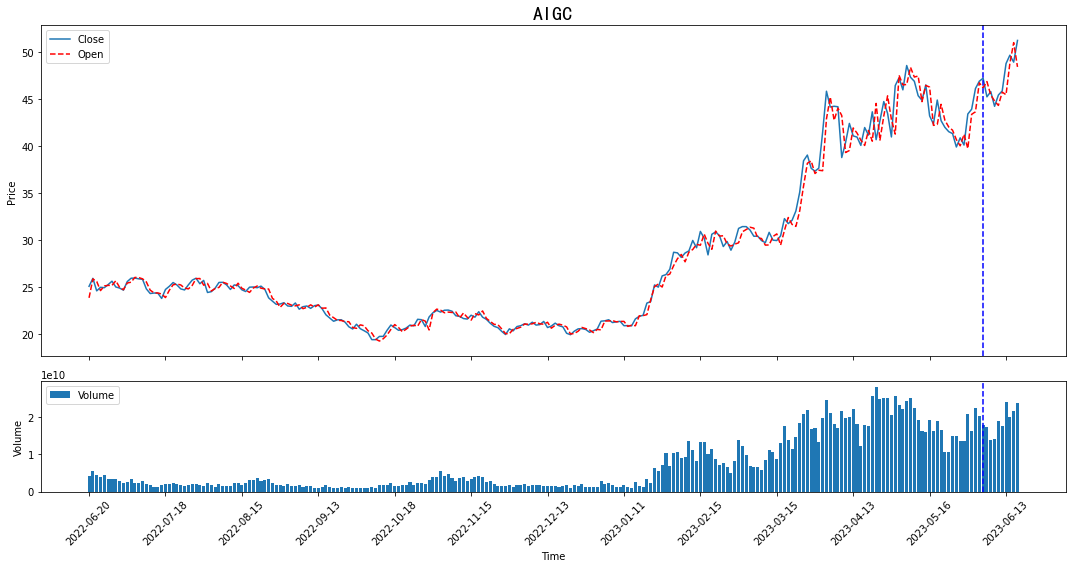

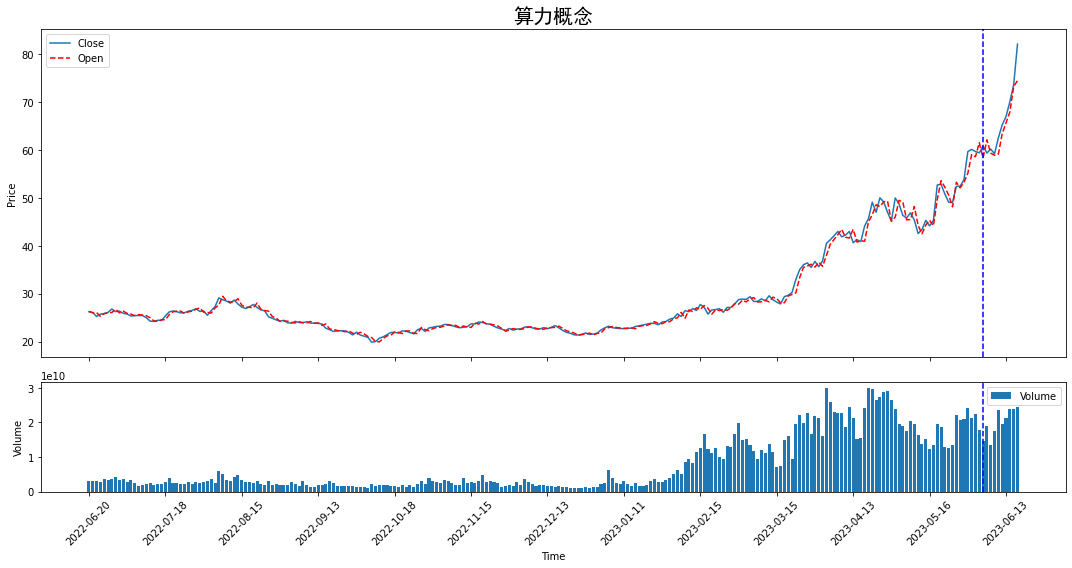

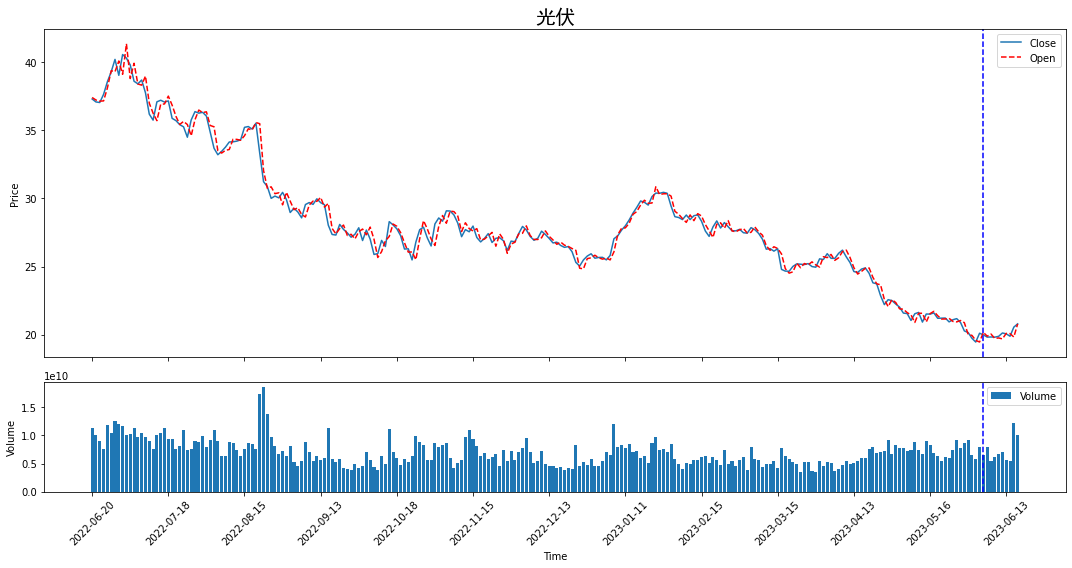

In [95]:
for data in data_list:
    stockPlot(data, predict_date_index=DEFAULT_LAST2WEKK, save=False)

In [96]:
prev_d = 10
for data in data_list:
    print("/".join(data["sector"].drop_duplicates().to_list()), 
          "{:.2%}".format((data[-prev_d:]['收盘'][-1] - data[-prev_d:]['收盘'][0])/data[-prev_d:]['收盘'][0]),
          "{:.2%}".format(maxProfit(data[-prev_d:]['收盘'])/data[-prev_d:]['收盘'][0])
          )

AIGC 8.52% 14.86%
算力概念 35.08% 37.66%
光伏 4.03% 4.87%


In [29]:
data[-5:]['收盘']

日期
2023-06-12    22.475331
2023-06-13    22.479690
2023-06-14    22.567633
2023-06-15    23.166681
2023-06-16    23.266485
Name: 收盘, dtype: float64

In [30]:
data

,收盘,开盘,成交额,sector
日期,,,,
2022-06-20,36.473573,36.459787,1.236212e+10,光伏
2022-06-21,36.312337,36.340987,1.100477e+10,光伏
2022-06-22,35.991582,36.383707,9.642388e+09,光伏
2022-06-23,36.582889,36.173555,9.550635e+09,光伏
2022-06-24,37.588360,37.037834,1.751143e+10,光伏
...,...,...,...,...
2023-06-12,22.475331,21.909505,8.761191e+09,光伏
2023-06-13,22.479690,22.474586,6.657922e+09,光伏
2023-06-14,22.567633,22.545582,6.950920e+09,光伏
